<a href="https://colab.research.google.com/github/HarshadaE25/Test-1/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolutional Neural Network

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Load the handwritten digit dataset

In [2]:
from keras.datasets import mnist

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
xtest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Viewing the image data

In [8]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

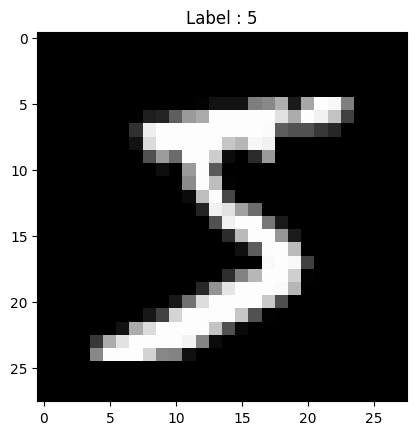

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap="gray")
plt.title(f"Label : {ytrain[0]}")
plt.show()

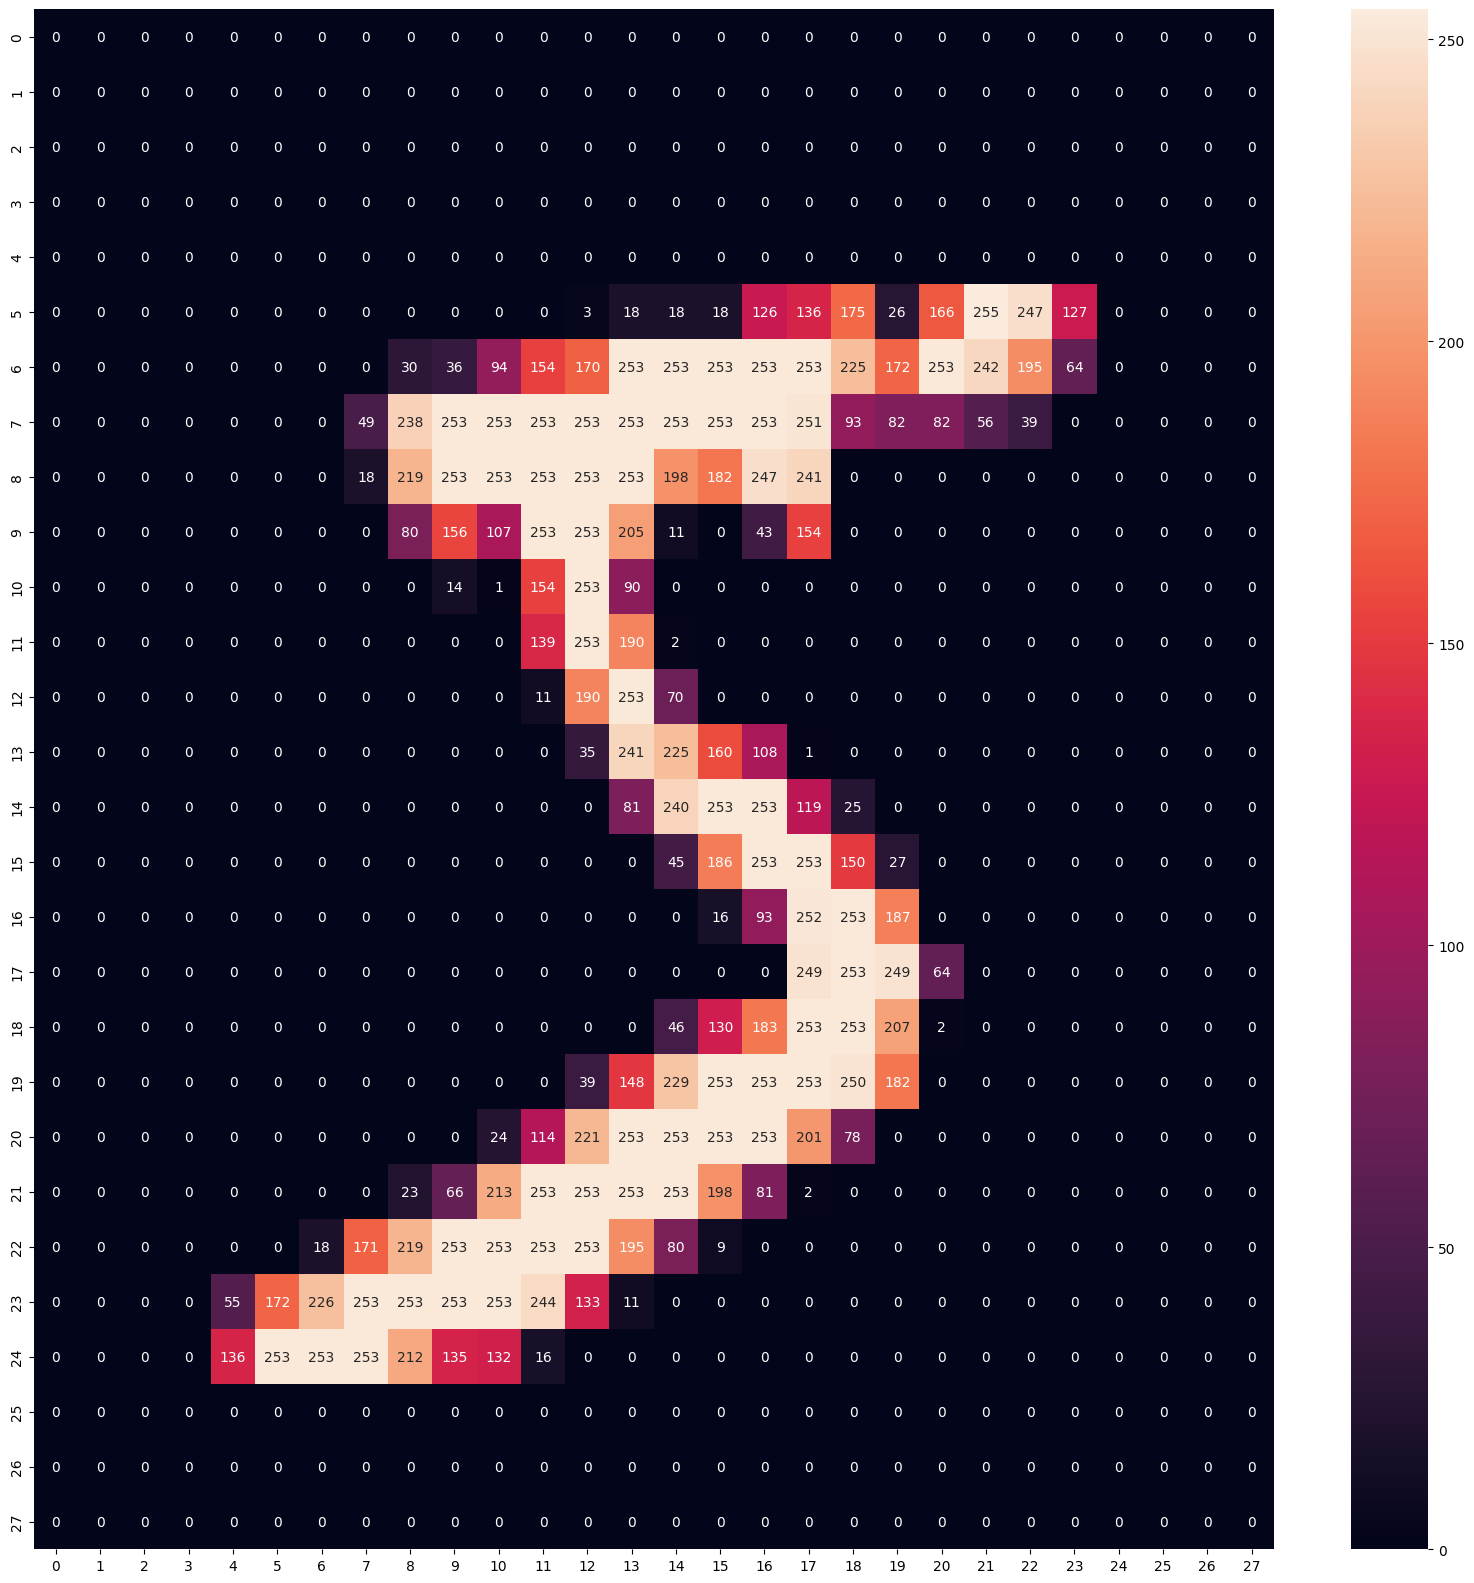

In [10]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(xtrain[0], annot=True, fmt="d")
plt.show()

### Show first 9 images

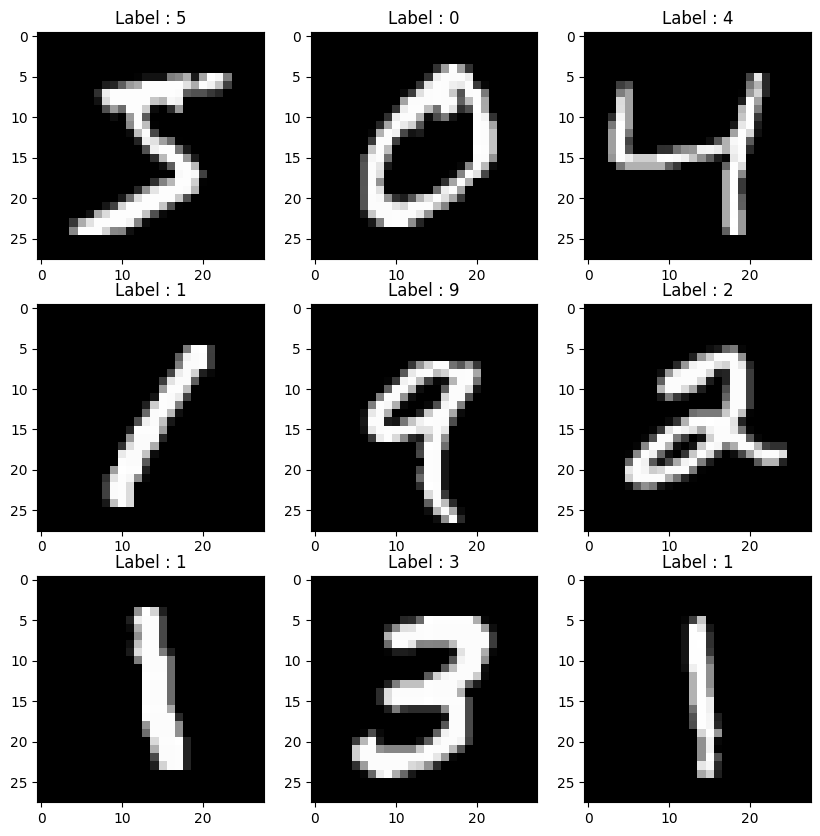

In [11]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap="gray")
  plt.title(f"Label : {ytrain[i]}")

In [12]:
xtrain.shape

(60000, 28, 28)

In [13]:
xtest.shape

(10000, 28, 28)

### Preprocess the data for training

In [14]:
xtrain_pre = xtrain.astype(float)/255
xtest_pre = xtest.astype(float)/255

In [15]:
xtrain_pre[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
xtest_pre[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
from keras.utils import to_categorical
ytrain_pre = to_categorical(ytrain)
ytest_pre = to_categorical(ytest)

In [18]:
ytrain[0]

5

In [19]:
ytrain_pre[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [20]:
ytest[0]

7

In [21]:
ytest_pre[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Build the CNN

In [22]:
xtrain.shape

(60000, 28, 28)

In [23]:
input_shape = (28, 28, 1)

In [24]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
output_labels = len(np.unique(ytrain))
output_labels

10

In [26]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [27]:
# Intialize the model
model = Sequential()

# Provide the input layer
model.add(Input(shape=input_shape))

# First convlution layer
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation="relu"))
# Max pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Second convolution layer
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation="relu"))
# Max pooling 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Add a dropout layer
model.add(Dropout(rate=0.5))

# Add softmax output layer for multiclass classification
model.add(Dense(units= output_labels, activation="softmax"))


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
hist = model.fit(xtrain_pre, ytrain_pre, validation_split=0.1, epochs=15, batch_size=128)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 106ms/step - accuracy: 0.7602 - loss: 0.7738 - val_accuracy: 0.9795 - val_loss: 0.0789
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 86s 115ms/step - accuracy: 0.9640 - loss: 0.1179 - val_accuracy: 0.9857 - val_loss: 0.0534
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 93s 141ms/step - accuracy: 0.9743 - loss: 0.0841 - val_accuracy: 0.9873 - val_loss: 0.0474
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 171ms/step - accuracy: 0.9788 - loss: 0.0698 - val_accuracy: 0.9872 - val_loss: 0.0432
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 66s 132ms/step - accuracy: 0.9816 - loss: 0.0585 - val_accuracy: 0.9902 - val_loss: 0.0370
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 73s 112ms/step - accuracy: 0.9820 - loss: 0.0551 - val_accuracy: 0.9912 - val_loss: 0.0338
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 117ms/step - accuracy: 0.9847 - loss: 0.0507 - val_accuracy: 0.9918 - val_loss: 0.0317
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.9845 - loss: 0

### Plot the learning curve

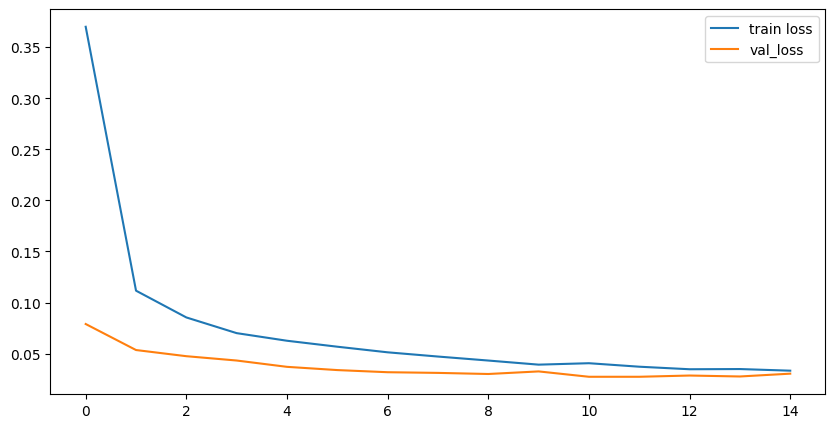

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="train loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

### Evaluate the model

In [32]:
model.evaluate(xtrain_pre, ytrain_pre)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9956 - loss: 0.0151


[0.016834743320941925, 0.9951666593551636]

In [33]:
model.evaluate(xtest_pre, ytest_pre)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9899 - loss: 0.0297


[0.02408723346889019, 0.9922000169754028]

In [34]:
xtrain.shape

(60000, 28, 28)

In [35]:
yprob_train = model.predict(xtrain_pre.reshape(60000, 28, 28, 1))
yprob_train

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step


array([[8.6310271e-11, 3.8549003e-10, 4.5603108e-09, ..., 2.8906888e-08,
        1.5223748e-05, 3.1747390e-05],
       [9.9999934e-01, 5.7841119e-15, 3.7209720e-08, ..., 9.8961499e-12,
        2.7982830e-08, 4.1436695e-07],
       [3.1305887e-12, 1.7137355e-06, 1.6618920e-08, ..., 9.1824140e-06,
        3.9649589e-07, 3.4964691e-05],
       ...,
       [1.2219380e-12, 2.1662510e-11, 1.0972325e-12, ..., 7.5646256e-14,
        5.9227921e-07, 3.9445236e-05],
       [9.3746174e-05, 9.4478942e-08, 4.5826170e-07, ..., 3.1837161e-10,
        6.8262831e-05, 3.4584069e-08],
       [3.0328843e-05, 3.6742404e-11, 2.1951332e-06, ..., 1.1220024e-07,
        9.9975824e-01, 2.0770582e-04]], dtype=float32)

In [36]:
yprob_train[0]

array([8.6310271e-11, 3.8549003e-10, 4.5603108e-09, 2.2424432e-02,
       5.3435481e-12, 9.7752863e-01, 6.1963809e-11, 2.8906888e-08,
       1.5223748e-05, 3.1747390e-05], dtype=float32)

In [37]:
ypred_train = np.argmax(yprob_train, axis=1)
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [38]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [39]:
xtest.shape

(10000, 28, 28)

In [40]:
yprob_test = model.predict(xtest_pre.reshape(10000, 28, 28, 1))
yprob_test[0:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[2.8636751e-09, 4.6335984e-09, 6.6905773e-06, 1.9637582e-05,
        1.6742885e-11, 4.9944077e-10, 8.6624175e-16, 9.9996728e-01,
        2.3722109e-08, 6.2765657e-06],
       [3.6544218e-06, 1.8141918e-05, 9.9996620e-01, 3.9761030e-09,
        8.0668883e-10, 6.2150341e-12, 6.7822630e-06, 3.4048191e-11,
        5.1253583e-06, 1.6535280e-11],
       [9.3508127e-08, 9.9970770e-01, 3.2949742e-06, 2.9764969e-08,
        2.3248687e-04, 8.7653639e-08, 1.8357035e-06, 4.7098576e-05,
        6.9456423e-06, 4.2191678e-07],
       [9.9995548e-01, 5.9222024e-12, 3.6542326e-06, 5.2309610e-09,
        1.0285555e-08, 3.9681531e-08, 3.2098222e-05, 2.7784655e-09,
        5.0409176e-06, 3.6110534e-06],
       [2.2025948e-10, 5.5420252e-10, 1.2174352e-10, 6.1460971e-12,
        9.9999315e-01, 2.7361301e-12, 9.6298847e-10, 1.8788175e-08,
        4.1264658e-09, 6.8273866e-06]], dtype=float32)

In [41]:
ypred_test = np.argmax(yprob_test, axis=1)
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [42]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

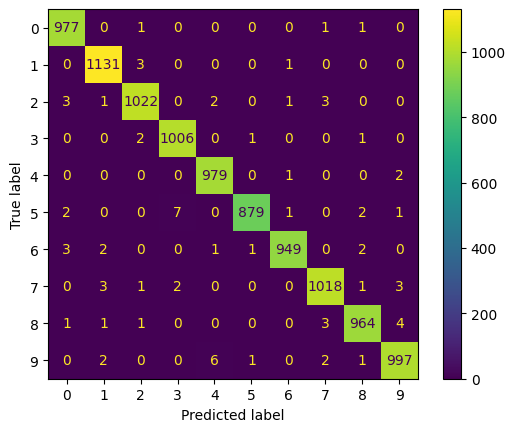

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### From above test data has f1_macro of 0.99 which > 0.8 hence it is a goood model

In [45]:
import cv2

In [46]:
def predict_label(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap="gray")
  plt.show()
  img = img.astype(float)/255
  probs = model.predict(img.reshape(1, 28, 28, 1))
  pred = np.argmax(probs, axis=1)
  return pred, np.max(probs)

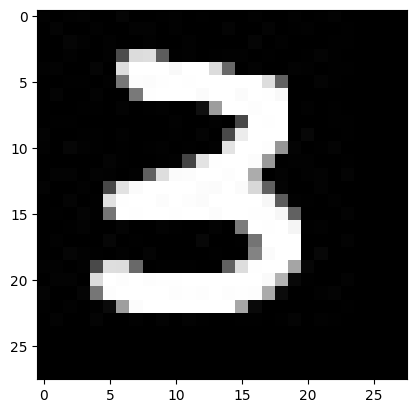

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


(array([3]), 0.9999999)

In [49]:
predict_label("/content/Img_3.jpg")

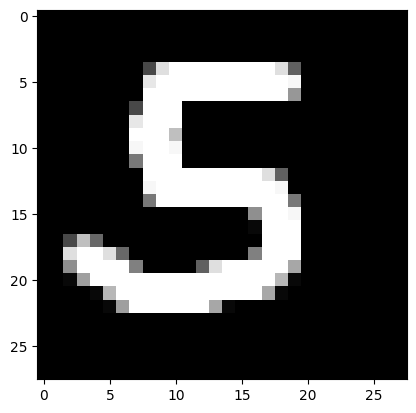

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


(array([5]), 0.99999654)

In [50]:
predict_label("/content/Img_5.png")

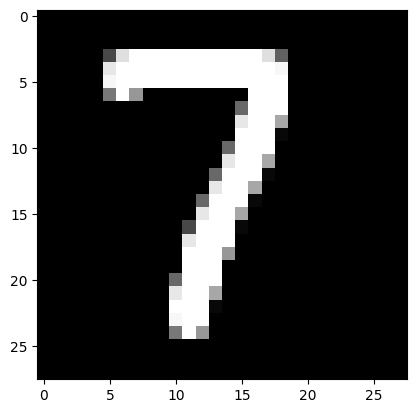

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


(array([7]), 0.60237795)

In [51]:
predict_label("/content/Img_7.png")

### Save the model

In [52]:
model.save("DigitModel.keras")

In [53]:
from keras.models import load_model

In [54]:
m = load_model("/content/DigitModel.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)